<a href="https://colab.research.google.com/github/tomonari-masada/course-nlp2020/blob/master/04_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04 PyTorch入門（１）
参考資料: 《20天吃掉那只Pytorch》 https://github.com/lyhue1991/eat_pytorch_in_20_days

## 04-01 テンソル
* NumPyのndarrayみたいなもの。
* ただし、微分ができる点が大きな違い。
* GPUに持っていける。

In [1]:
import numpy as np
import torch

### PyTorchのテンソルのデータ型

In [2]:
i = torch.tensor(1)
print(i, i.dtype)
x = torch.tensor(2.0)
print(x, x.dtype)
b = torch.tensor(True)
print(b, b.dtype)

tensor(1) torch.int64
tensor(2.) torch.float32
tensor(True) torch.bool


### 特定の型のテンソルとして初期化(1)

In [3]:
# double型は特に理由がない限りは使わないほうがいいかもしれない。
i = torch.tensor(1, dtype=torch.int32)
print(i, i.dtype)
x = torch.tensor(2.0, dtype=torch.float)
print(x, x.dtype)
z = torch.tensor(2.0, dtype=torch.double)
print(z, z.dtype)

tensor(1, dtype=torch.int32) torch.int32
tensor(2.) torch.float32
tensor(2., dtype=torch.float64) torch.float64


### 特定の型のテンソルとして初期化(2)

In [4]:
i = torch.IntTensor([1,2,3])
print(i, i.dtype)
x = torch.FloatTensor(np.array([2.0,-4.0]))
print(x, x.dtype)
b = torch.BoolTensor(np.array([1,0,2,0]))
print(b, b.dtype)

tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([ 2., -4.]) torch.float32
tensor([ True, False,  True, False]) torch.bool


### 型の変換

In [5]:
i = torch.tensor(1)
print(i, i.dtype)
x = i.float()
print(x, x.dtype)
y = i.type(torch.float)
print(y, y.dtype)
z = i.type_as(x)
print(z, z.dtype)

tensor(1) torch.int64
tensor(1.) torch.float32
tensor(1.) torch.float32
tensor(1.) torch.float32


### スカラーとベクトル

In [6]:
scalar = torch.tensor(1.0)
print(scalar)
print(scalar.dim())
print()
vector = torch.tensor([1.0,2.0,3.0,4.0])
print(vector)
print(vector.dim())
print(vector.shape)
print()
vector = torch.tensor([4.0])
print(vector)
print(vector.dim())
print(vector.shape)

tensor(1.)
0

tensor([1., 2., 3., 4.])
1
torch.Size([4])

tensor([4.])
1
torch.Size([1])


### 行列

In [7]:
matrix = torch.tensor([[1.0,2.0],[3.0,4.0]])
print(matrix)
print(matrix.dim())
print(matrix.shape)
print(matrix[1,1])

tensor([[1., 2.],
        [3., 4.]])
2
torch.Size([2, 2])
tensor(4.)


### テンソル

In [8]:
tensor3 = torch.tensor([[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0,8.0]]])
print(tensor3)
print(tensor3.dim())
print(tensor3.shape)
print(tensor3[1,1,1])

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
tensor(8.)


In [9]:
tensor4 = torch.tensor([[[[1.0,1.0],[2.0,2.0]],[[3.0,3.0],[4.0,4.0]]],
                        [[[5.0,5.0],[6.0,6.0]],[[7.0,7.0],[8.0,8.0]]]])
print(tensor4)
print(tensor4.dim())
print(tensor4.shape)
print(tensor4[1,1,1,1])

tensor([[[[1., 1.],
          [2., 2.]],

         [[3., 3.],
          [4., 4.]]],


        [[[5., 5.],
          [6., 6.]],

         [[7., 7.],
          [8., 8.]]]])
4
torch.Size([2, 2, 2, 2])
tensor(8.)


In [10]:
tensor3 = torch.tensor([[[1.0,2.0],[3.0,4.0]],[[5.0,6.0],[7.0,8.0]]])
print(tensor3)
print(tensor3.dim())
print(tensor3.shape)
print(tensor3.size())

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
3
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


### view()によるテンソルの形の変更

In [11]:
vector = torch.arange(0,12)
print(vector)
print(vector.shape)

matrix34 = vector.view(3,4)
print(matrix34)
print(matrix34.shape)

matrix43 = vector.view(4,-1)
print(matrix43)
print(matrix43.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
torch.Size([4, 3])


### reshape()によるテンソルの形の変更

In [12]:
matrix26 = torch.arange(0,12).view(2,6)
print(matrix26)
print(matrix26.shape)

matrix62 = matrix26.t()
print(matrix62.is_contiguous())
print(matrix62.contiguous().is_contiguous())

#matrix34 = matrix62.view(3,4) # これはエラーになる
matrix34 = matrix62.reshape(3,4)
print(matrix34)

matrix34 = matrix62.contiguous().view(3,4) # これはエラーにならない
print(matrix34)

matrix34 = matrix62.reshape(-1,4)
print(matrix34)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])
False
True
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


### NumPyのndarrayからfrom_numpy()でPyTorchのテンソルを作る

In [13]:
arr = np.zeros(3)
tensor = torch.from_numpy(arr)
print(arr)
print(tensor)

# 元のndarrayを変更するとテンソルも変更されることに注意！
np.add(arr, 1, out=arr)
print(arr)
print(tensor)

[0. 0. 0.]
tensor([0., 0., 0.], dtype=torch.float64)
[1. 1. 1.]
tensor([1., 1., 1.], dtype=torch.float64)


In [14]:
tensor = torch.zeros(3)
arr = tensor.numpy()
print(tensor)
print(arr)

# テンソルのほうを変更しても元のndarrayが変更されることに注意！
tensor.add_(1)
print(tensor)
print(arr)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[1. 1. 1.]


### clone()によるテンソルの複製

In [15]:
tensor = torch.zeros(3)

arr = tensor.clone().numpy()
print(tensor)
print(arr)

tensor.add_(1) #给 tensor增加1，arr不再随之改变
print(tensor)
print(arr)

tensor([0., 0., 0.])
[0. 0. 0.]
tensor([1., 1., 1.])
[0. 0. 0.]


### item()とtolist()によるPythonの組み込み型への変換

In [16]:
scalar = torch.tensor(1.0)
s = scalar.item()
print(s)
print(type(s))

tensor = torch.rand(2,2)
t = tensor.tolist()
print(t)
print(type(t))

1.0
<class 'float'>
[[0.6959741115570068, 0.5034485459327698], [0.8959354758262634, 0.27817434072494507]]
<class 'list'>


## 04-02 自動微分

### バックプロパゲーション
* それに関して微分をしたい変数についてrequires_gradをTrueにセットする。
 * デフォルトではFalseになっている。
* requires_gradがTrueの変数を含む計算が実行されると、計算グラフが内部的に構成される。
 * この自動微分の方式をdefine by runと呼ぶ。
* 微分する関数についてbackward()を実行することで、微分がおこなわれる。

In [17]:
import numpy as np 
import torch

# f(x) = a*x**2 + b*x + cの、x=2におけるxに関する微分係数を求める

x = torch.tensor(2.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)

y = a * torch.pow(x, 2) + b * x + c

y.backward()
print(x.grad)

tensor(2.)


### 計算グラフ
* バックプロパゲーションが可能なのは計算グラフが作られているから。
* その計算グラフをtorchvizで可視化してみる。

In [18]:
!pip install torchviz

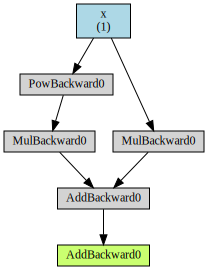

In [19]:
from torchviz import make_dot

x = torch.tensor([2.0], requires_grad=True)
a = torch.tensor([1.0])
b = torch.tensor([-2.0])
c = torch.tensor([1.0])

y = a * torch.pow(x, 2) + b * x + c
make_dot(y, params={'x':x})

### autograd()を使った高階微分
* 第一引数は微分される関数
* 第二引数はそれに関して微分する変数
* create_graphをTrueにすると計算グラフが作られるので、高階微分を計算できるようになる。

In [20]:
x = torch.tensor(0.0, requires_grad=True)
a = torch.tensor(1.0)
b = torch.tensor(-2.0)
c = torch.tensor(1.0)
d = torch.tensor(5.0)
y = a * torch.pow(x, 3) + b * torch.pow(x, 2) + c * x + d

dy_dx = torch.autograd.grad(y, x, create_graph=True)[0]
print(dy_dx.data)

dy2_dx2 = torch.autograd.grad(dy_dx, x)[0]
print(dy2_dx2.data)

tensor(1.)
tensor(-4.)


### 多変数関数の偏微分とヘシアン

In [21]:
def func(x1, x2):
  return (x1 + 3 * x2) ** 2

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y = func(x1, x2)

dy_dx1, dy_dx2 = torch.autograd.grad(outputs=y, inputs=[x1, x2], create_graph=True)
print(dy_dx1.data, dy_dx2.data)
dy_dx1dx1, dy_dx1dx2 = torch.autograd.grad(outputs=dy_dx1, inputs=[x1, x2], retain_graph=True)
print(dy_dx1dx1.data, dy_dx1dx2.data)
dy_dx2dx1, dy_dx2dx2 = torch.autograd.grad(outputs=dy_dx2, inputs=[x1, x2])
print(dy_dx2dx1.data, dy_dx2dx2.data)

print(torch.autograd.functional.hessian(func, inputs=(x1, x2)))

tensor(14.) tensor(42.)
tensor(2.) tensor(6.)
tensor(6.) tensor(18.)
((tensor(2.), tensor(6.)), (tensor(6.), tensor(18.)))


## 04-03 自動微分を使った制約なし最適化

In [22]:
def f(x, a=1.0, b=-2.0, c=1.0):
  return a * torch.pow(x, 2) + b * x + c

x = torch.tensor(10.0, requires_grad=True)
optimizer = torch.optim.SGD(params=[x], lr=0.1)

for i in range(1, 101):
  optimizer.zero_grad()
  y = f(x)
  y.backward()
  optimizer.step()
  if i % 5 == 0:
    print(f'iter {i} : f(x) = {y.data:.6f}, x = {x.data:.6f}')

iter 5 : f(x) = 13.589545, x = 3.949120
iter 10 : f(x) = 1.459167, x = 1.966368
iter 15 : f(x) = 0.156677, x = 1.316659
iter 20 : f(x) = 0.016823, x = 1.103763
iter 25 : f(x) = 0.001806, x = 1.034001
iter 30 : f(x) = 0.000194, x = 1.011142
iter 35 : f(x) = 0.000021, x = 1.003651
iter 40 : f(x) = 0.000002, x = 1.001196
iter 45 : f(x) = 0.000000, x = 1.000392
iter 50 : f(x) = 0.000000, x = 1.000128
iter 55 : f(x) = 0.000000, x = 1.000042
iter 60 : f(x) = 0.000000, x = 1.000014
iter 65 : f(x) = 0.000000, x = 1.000005
iter 70 : f(x) = 0.000000, x = 1.000001
iter 75 : f(x) = 0.000000, x = 1.000000
iter 80 : f(x) = 0.000000, x = 1.000000
iter 85 : f(x) = 0.000000, x = 1.000000
iter 90 : f(x) = 0.000000, x = 1.000000
iter 95 : f(x) = 0.000000, x = 1.000000
iter 100 : f(x) = 0.000000, x = 1.000000


# 課題4
* 関数$f(x_1,x_2)=x_1^2+x_2^2$の最小値と、$f(x_1,x_2)$がその最小値をとるときの$x_1$と$x_2$の値を、PyTorchの自動微分を使って求めよう。